In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test-data', 'speaker-id', 'filestxt']


In [2]:
import torch
import numpy as np
import librosa
import pickle as pickle
from scipy.io.wavfile import read
import os
import random
import matplotlib.pyplot as plt
import librosa.display

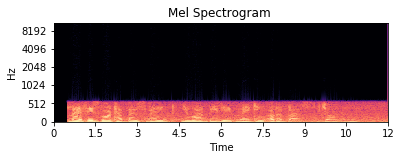

In [3]:
source = '../input/speaker-id/'

signal, rate = librosa.load(source + 'Rohit_1.wav', sr=44100)
spec = librosa.feature.melspectrogram(signal, sr=44100, hop_length=441)
plt.subplot(2,1,1)
librosa.display.specshow(librosa.power_to_db(np.abs(librosa.stft(signal)), ref=np.max), y_axis='mel', x_axis='time')
plt.title('Mel Spectrogram ')
plt.show()

In [4]:
train_file = '../input/filestxt/files.txt'
file_paths = open(train_file,'r')
l = []

for path in file_paths:
    path = path.strip()
    print(path)
    
    signal, rate = librosa.load(source + path, sr=44100)
    
    x = librosa.feature.mfcc(signal, sr=44100, n_mfcc=20)
    l.append(x)
    
#l

Rohit_1.wav
Rohit_2.wav
Rohit_3.wav
Rohit_4.wav
Rohit_5.wav
Rohit_6.wav
Rohit_7.wav
Rohit_8.wav
Rohit_9.wav
Rohit_10.wav
Varun_1.wav
Varun_2.wav
Varun_3.wav
Varun_4.wav
Varun_5.wav
Varun_6.wav
Varun_7.wav
Varun_8.wav
Varun_9.wav
Varun_10.wav


In [5]:
for i in range(len(l)):
    print(l[i].shape)

(20, 517)
(20, 448)
(20, 517)
(20, 690)
(20, 690)
(20, 483)
(20, 448)
(20, 414)
(20, 517)
(20, 483)
(20, 662)
(20, 552)
(20, 552)
(20, 552)
(20, 552)
(20, 331)
(20, 442)
(20, 442)
(20, 221)
(20, 442)


In [6]:
import tensorflow as tf
b = []
for i in range(len(l)):
    
    x = l[i]
    
    y = x[:, :200]
    
    l[i] = y
    
    l[i] /= 1000

    b.append(l[i])
    
for i in range(len(l)):
    
    l[i].reshape([20 ,20 ,10, 1])
    

    print(l[i].shape)

(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)


In [7]:
#from keras.models import Sequential
#from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#nClasses = 2
#input_shape = (20, 200, 1)

#def Model():
    
#    model = Sequential()
    
#    model.add(Conv2D(10, (3,3), padding='same', activation='relu', input_shape=input_shape))
#    model.add(Conv2D(10, (3,3), activation='relu'))
#    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))
    
    #model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(20, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
   # model.add(Dropout(0.25))
  
  #  model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
 #   model.add(MaxPooling2D(pool_size=(2, 2)))
#    model.add(Dropout(0.25))
  
   # model.add(Flatten())
  #  model.add(Dense(nClasses, activation='softmax'))
  
 #   return model

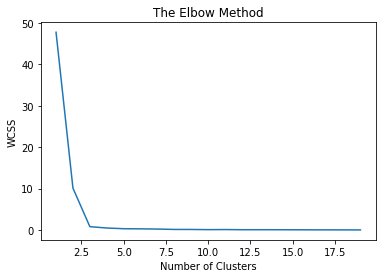

In [8]:
import numpy as np 
import matplotlib.pyplot as pl
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
	kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
	kmeans.fit(l[i])
	wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

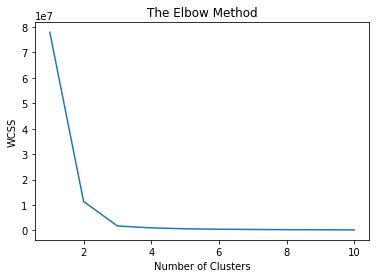

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
	kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
	kmeans.fit(x)
	wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
X = np.hstack([x,y])
X.shape

(20, 642)

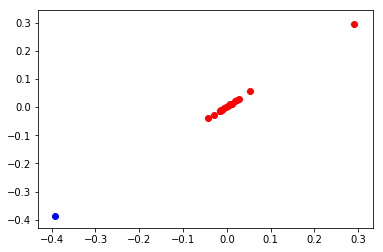

In [11]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], c='blue', label='Cluster 2')
#plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], c='cyan', label='Cluster 3')
#plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], c='green', label='Cluster 4')
#plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], c='magenta', label='Cluster 5')

array([ 0.01572688, -0.3920041 ])

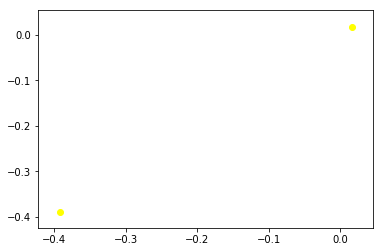

In [12]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', label='Centroids')
c1 = kmeans.cluster_centers_[:, 0]
c2 = kmeans.cluster_centers_[:, 1]
c1

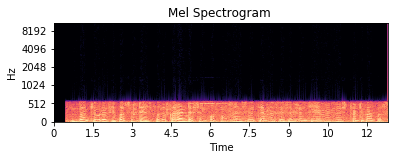

In [13]:
source = '../input/test-data/'

signal, rate = librosa.load(source + 'Varun_test.wav', sr=44100)
spec = librosa.feature.melspectrogram(signal, sr=44100, hop_length=441)
plt.subplot(2,1,1)
librosa.display.specshow(librosa.power_to_db(np.abs(librosa.stft(signal)), ref=np.max), y_axis='mel', x_axis='time')
plt.title('Mel Spectrogram ')
plt.show()

In [14]:
x = librosa.feature.mfcc(signal, sr=44100, n_mfcc=20)
y = x[:, :200]
y /= 100

In [15]:
y = np.reshape(y, (2000,2))
y

array([[-6.77138204, -6.77138204],
       [-6.77138204, -6.77138204],
       [-6.77138204, -6.77138204],
       ...,
       [-0.01257501, -0.0968056 ],
       [-0.13336572, -0.14979952],
       [-0.16085728, -0.16098297]])

In [16]:
y.shape

(2000, 2)

In [17]:
y = np.mean(y, axis=0)
y

array([-0.1206561 , -0.11983417])

In [18]:
from scipy.spatial import distance

dst1 = distance.euclidean(c1, y)
dst2 = distance.euclidean(c2, y)